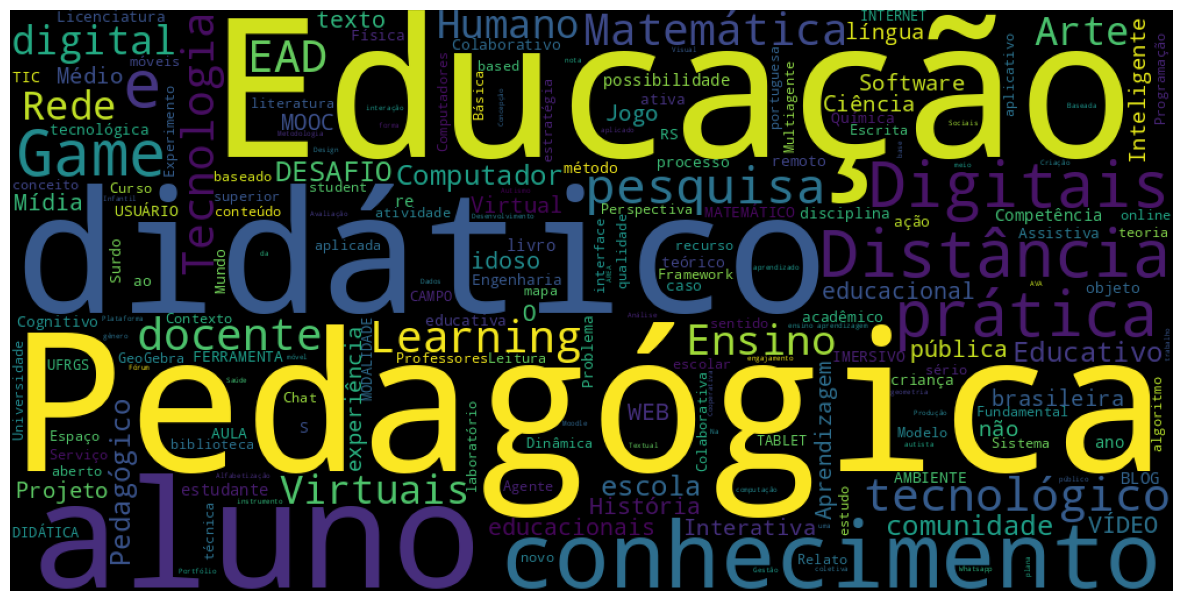

In [4]:
from os import removexattr
import requests
from bs4 import BeautifulSoup
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

lista = []
url_list = []

url_list = [
    'https://seer.ufrgs.br/index.php/renote/issue/view/5020',
    'https://seer.ufrgs.br/index.php/renote/issue/view/4857',
    'https://seer.ufrgs.br/index.php/renote/issue/view/4767',
    'https://seer.ufrgs.br/index.php/renote/issue/view/4659',
    'https://seer.ufrgs.br/index.php/renote/issue/view/4493',
    'https://seer.ufrgs.br/index.php/renote/issue/view/4430',
    'https://seer.ufrgs.br/index.php/renote/issue/view/4216',
    'https://seer.ufrgs.br/index.php/renote/issue/view/4004',
    'https://seer.ufrgs.br/index.php/renote/issue/view/3727',
    'https://seer.ufrgs.br/index.php/renote/issue/view/3726',
    'https://seer.ufrgs.br/index.php/renote/issue/view/3725',
    'https://seer.ufrgs.br/index.php/renote/issue/view/3640',
    'https://seer.ufrgs.br/index.php/renote/issue/view/3542',
    'https://seer.ufrgs.br/index.php/renote/issue/view/3389',
    'https://seer.ufrgs.br/index.php/renote/issue/view/3144',
    'https://seer.ufrgs.br/index.php/renote/issue/view/2871',
    'https://seer.ufrgs.br/index.php/renote/issue/view/2864',
    'https://seer.ufrgs.br/index.php/renote/issue/view/2737',
    'https://seer.ufrgs.br/index.php/renote/issue/view/2618',
    'https://seer.ufrgs.br/index.php/renote/issue/view/2510',
    'https://seer.ufrgs.br/index.php/renote/issue/view/2354',
    'https://seer.ufrgs.br/index.php/renote/issue/view/2266',
    'https://seer.ufrgs.br/index.php/renote/issue/view/2240',
    'https://seer.ufrgs.br/index.php/renote/issue/view/2162',
    'https://seer.ufrgs.br/index.php/renote/issue/view/1949',
    'https://seer.ufrgs.br/index.php/renote/issue/view/1788',
    'https://seer.ufrgs.br/index.php/renote/issue/view/1718',
    'https://seer.ufrgs.br/index.php/renote/issue/view/1543',
    'https://seer.ufrgs.br/index.php/renote/issue/view/1524',
    'https://seer.ufrgs.br/index.php/renote/issue/view/1457',
    'https://seer.ufrgs.br/index.php/renote/issue/view/1196',
    'https://seer.ufrgs.br/index.php/renote/issue/view/1023',
    'https://seer.ufrgs.br/index.php/renote/issue/view/960',
    'https://seer.ufrgs.br/index.php/renote/issue/view/952',
    'https://seer.ufrgs.br/index.php/renote/issue/view/951',
    'https://seer.ufrgs.br/index.php/renote/issue/view/950',
    'https://seer.ufrgs.br/index.php/renote/issue/view/948',
    'https://seer.ufrgs.br/index.php/renote/issue/view/949',
    'https://seer.ufrgs.br/index.php/renote/issue/view/947',
    'https://seer.ufrgs.br/index.php/renote/issue/view/946',
    'https://seer.ufrgs.br/index.php/renote/issue/view/945',
    'https://seer.ufrgs.br/index.php/renote/issue/view/944',
    'https://seer.ufrgs.br/index.php/renote/issue/view/943',
    'https://seer.ufrgs.br/index.php/renote/issue/view/932',
    'https://seer.ufrgs.br/index.php/renote/issue/view/931',
    'https://seer.ufrgs.br/index.php/renote/issue/view/930',
    'https://seer.ufrgs.br/index.php/renote/issue/view/747',
    'https://seer.ufrgs.br/index.php/renote/issue/view/744'
    ]

for link in url_list:
  response = requests.get(link)
  soup = BeautifulSoup(response.content, 'html.parser')

  titulos = soup.find_all('h3', class_='title')

  for i in titulos:
    lista.append(i.get_text())

for i in range(len(lista)):
  lista[i] = lista[i].replace('\t', '').replace('\n', '').replace('Editorial', '').replace('Modelo de formatação dos artigos submetidos na Revista EaD em Foco', '')


ignorar = { 'de', 'para', 'com', 'a', 'o', 'os', 'as', 'que', 'e', 'na', 'nos' }
ocorrencias = Counter()
for linha in lista:
  ocorrencias.update(palavra for palavra in linha.split() if palavra not in ignorar)

unique_string=(" ").join(ocorrencias)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()
